2. Polynomial Regression of Temperature Data: For this problem you will perform
polynomial regression of global temperature data from 1880-2020. The datafile
‘global_temp_data.csv’ contains the year in the first column and yearly average
temperature (change from temperature in 1951) in the second column. The figure
below shows a plot of the global temperature change as a function of time.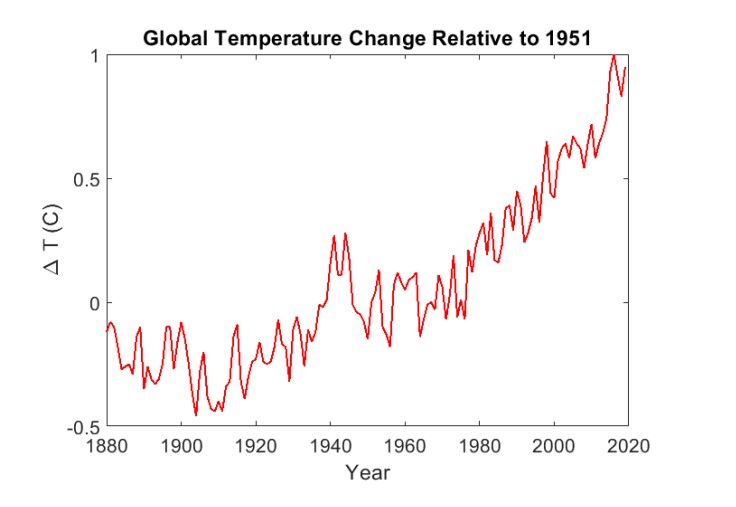

In [25]:
#importing neccessary python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
#importing modules from scikit learn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [27]:
#loading the data
data=pd.read_csv("/content/global_temp_data.csv")

In [28]:
data.head(5) #viewing the first five values

,Year,Value
0,1880,-0.12
1,1881,-0.08
2,1882,-0.10
3,1883,-0.18
4,1884,-0.27


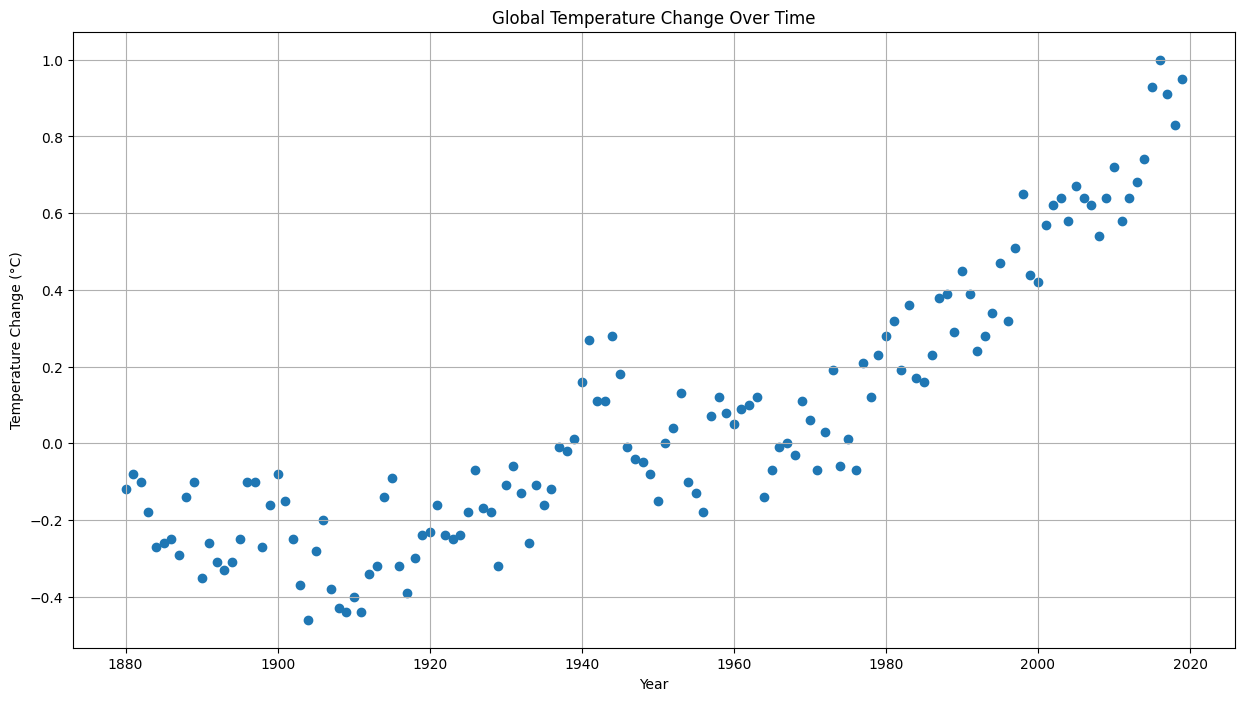

In [31]:
#Plotting scatter plot of the data
plt.figure(figsize=(15, 8))
plt.scatter(data["Year"], data["Value"],)
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.title("Global Temperature Change Over Time")
plt.grid(True)
plt.show()

In [32]:
# Extracting features and target variable
X = data["Year"].values.reshape(-1, 1)
y = data["Value"].values

In [33]:
# Standardize the year values (as year numerical values are above 1800 we are standardizing to improve numerical stability in the model)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

a) Using a 10-fold cross validation (CV) method, build the optimal polynomial model to
fit the temperature data. What is the degree of the polynomial? Include a plot of the
mean CV score as a function of the polynomial degree (up to 20).

In [34]:
# Performing cross-validation for polynomial degrees 1 to 20
degrees = range(1, 21)
mean_cv_scores = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=10, scoring="neg_mean_squared_error",verbose=3)
    mean_cv_scores.append(-scores.mean())

[CV] END ............................... score: (test=-0.096) total time=   0.0s
[CV] END ............................... score: (test=-0.023) total time=   0.0s
[CV] END ............................... score: (test=-0.026) total time=   0.0s
[CV] END ............................... score: (test=-0.015) total time=   0.0s
[CV] END ............................... score: (test=-0.019) total time=   0.0s
[CV] END ............................... score: (test=-0.021) total time=   0.0s
[CV] END ............................... score: (test=-0.066) total time=   0.0s
[CV] END ............................... score: (test=-0.010) total time=   0.0s
[CV] END ............................... score: (test=-0.019) total time=   0.0s
[CV] END ............................... score: (test=-0.119) total time=   0.0s
[CV] END ............................... score: (test=-0.007) total time=   0.0s
[CV] END ............................... score: (test=-0.012) total time=   0.0s
[CV] END ...................

In [39]:
# Identifying the optimal degree (highest mean CV score)
optimal_degree = degrees[np.argmin(mean_cv_scores)]
print(f"Optimal Polynomial Degree: {optimal_degree}")


Optimal Polynomial Degree: 2


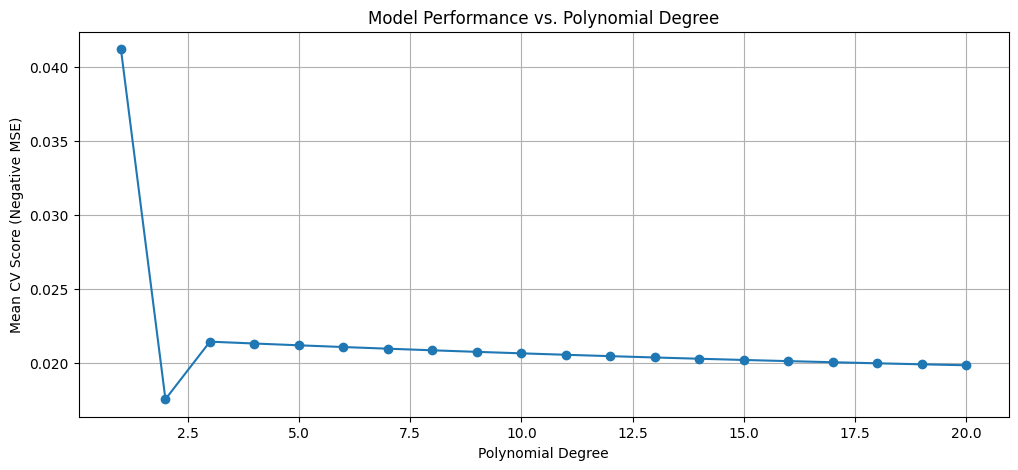

In [38]:
# Plotting the mean CV score as a function of polynomial degree
plt.figure(figsize=(12, 5))
plt.plot(degrees, mean_cv_scores, marker='o', linestyle='-')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean CV Score (Negative MSE)")
plt.title("Model Performance vs. Polynomial Degree")
plt.grid(True)
plt.show()

In [40]:
poly = PolynomialFeatures(degree=optimal_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

b) Overly a plot of your model over the data between 1880 and 2040.

In [41]:
# Generating predictions from 1880 to 2040
future_years = np.arange(1880, 2041).reshape(-1, 1)
future_X_poly = poly.transform(future_years)
future_predictions = model.predict(future_X_poly)

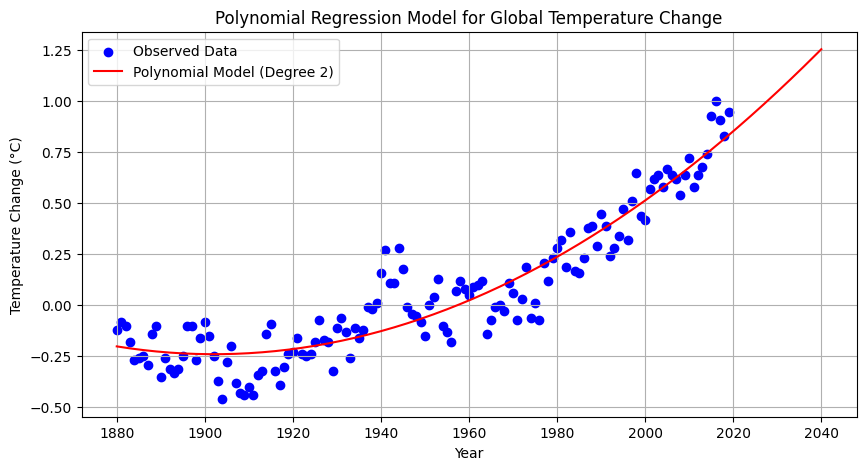

In [42]:
# Ploting original data and polynomial regression fit
plt.figure(figsize=(10, 5))
plt.scatter(data["Year"], data["Value"], color="blue", label="Observed Data")
plt.plot(future_years, future_predictions, color="red", label=f"Polynomial Model (Degree {optimal_degree})")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.title("Polynomial Regression Model for Global Temperature Change")
plt.legend()
plt.grid(True)
plt.show()

c) Using the model, what is the expected temperature change in 2040?

In [44]:
# Predicting temperature change in 2040
year_2040 = np.array([[2040]])
year_2040_poly = poly.transform(year_2040)
predicted_temp_2040 = model.predict(year_2040_poly)[0]
print(f"Predicted Temperature Change in 2040: {predicted_temp_2040:.2f}°C")

Predicted Temperature Change in 2040: 1.26°C


d) Provide an estimate of the error (in degrees celsius) in your prediction from (c).
Hint* What error metric could be useful?

In [45]:
# Estimating prediction error using RMSE
y_pred_train = model.predict(X_poly)
rmse = np.sqrt(mean_squared_error(y, y_pred_train))
print(f"Estimated Prediction Error (RMSE): ±{rmse:.2f}°C")

Estimated Prediction Error (RMSE): ±0.12°C


e) The model is making a prediction for 19 years in the future based on current and
past trends. Describe in words any concerns you should have (and why) in
interpreting that prediction.


Concerns forecasting 19 years inth future based on current and past trends.
1. The polynomial regression model predicts future as a quadratic equation(degree=2), makes it a very simple model which doesn't account external real time factors like climate changes, carbon reduction awareness and technological advancements, industrial emissions regulations, volacanic activity, geographical features

2. Climate trends are non-stationery in real world but the model assumes it to be a smooth continous trend

3.The model captures general warming trend but doesn't account for the underlying physics(CO2 emissions, deforestation etc.)